## Assignment - WE11-Autoencoder

In this exercise, you will create an autoencoder that recognizes 10 digits and the first and last characters of your last name.

1. Create a 28x28 pixel image of these characters. For instance, if the first character of your last name is K, then create 1 version of K and save this as a 28x28 image. Do this for the last character as well.

2. Create a notebook (you should start with the tutorial #3 notebook - it will save you time). Load the MNIST dataset (see the tutorial from class) and the autoencoder you created and saved in Tutorial #1. Display the predictions for your two new characters and compare these to the original. 

3. Create a new autoencoder, and train this autoencoder with the MNIST dataset and your new images added. Add enough copies of your new characters to the MNIST dataset so that your model can identify your new characters.

4. Demonstrate your new encoding by showing the autoencoder recreate a random set of digits and your new characters.

## Part 1

I have successfully created a 28x28 pixel images for the first and last characters of my last name(Letters - 'A' and 'S').

## Part 2

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
import tensorflow as tf
from tensorflow.keras.preprocessing import image

2023-06-19 20:28:14.704949: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


### Load our pretrained model

In [3]:
pretrained_model = keras.models.load_model('initially_trained_autoencoder.tf')

2023-06-19 20:28:17.781039: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Loading the two new characters and testing the autoencoder on these two new characters

1/1 [==============================] - 0s 167ms/step
(1, 784)
1/1 [==============================] - 0s 11ms/step
(1, 784)


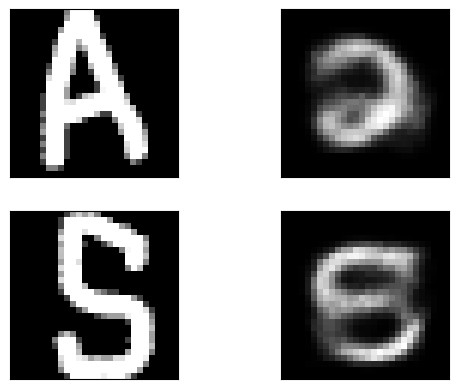

In [4]:
####################################
# loading image 1
image1 = tf.keras.utils.load_img('Letter_A.png', target_size=(28, 28), color_mode = "grayscale")

# loading image 2
image2 = tf.keras.utils.load_img('Letter_S.png', target_size=(28, 28), color_mode = "grayscale")

####################################
# predict an image from this sample
input_arr1 = tf.keras.utils.img_to_array(image1)
input_arr1 = input_arr1/ 255 # normalize between 0 and 1
input_arr1 = input_arr1.reshape(784)
input_arr1 = np.array([input_arr1])  # Convert single image to a batch with one image in it

prediction_01 = pretrained_model.predict(input_arr1)
print(prediction_01.shape)

####################################
# predict an image from this sample
input_arr2 = tf.keras.utils.img_to_array(image2)
input_arr2 = input_arr2/ 255 # normalize between 0 and 1
input_arr2 = input_arr2.reshape(784)
input_arr2 = np.array([input_arr2])  # Convert single image to a batch with one image in it

prediction_02 = pretrained_model.predict(input_arr2)
print(prediction_02.shape)

#####################################

#####################################
# display the four images side by side
# 
plt.subplot(2,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image1, cmap="gray")


plt.subplot(2,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(prediction_01[0].reshape(28,28), cmap="gray")

# 
plt.subplot(2,2,3)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image2, cmap="gray")


plt.subplot(2,2,4)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(prediction_02[0].reshape(28,28), cmap="gray")


plt.show()

As we didn't input these symbols, we can see the autoencoder doesn't do a good job with these new symbols.

## Part 3

### Now training the model on the original 10 digits and with the new symbols mixed in   

Let's try to retrain the original model with a mix of the new symbols and the original 10. Our goal it so avoid retraining with the entire original test test, and instead only use a small subset of the original test set.

In [5]:
# number of samples of the new images; we can adjust as needed
num_new = 50
# number of samples from the MNIST dataset to use to include in this new dataset
num_mnist = 500

input_arr1 = input_arr1.reshape(784) # flatten the 1st image
input_arr2 = input_arr2.reshape(784) # flatten the 1st image
np.random.shuffle(train_images) # shuffle the MNIST dataset

new_images_01 = [input_arr1 for _ in range(num_new)] # create a new dataset of the same image
new_images_02 = [input_arr2 for _ in range(num_new)] # create a new dataset of the same image


new_image_set = np.vstack((train_images[:num_mnist], new_images_01,new_images_02)) # combine the new images with the MNIST images
np.random.shuffle(new_image_set) # shuffle the new dataset

new_images_train, new_images_test = np.split(new_image_set, [int(len(new_image_set)*.8)]) # split into training and test sets


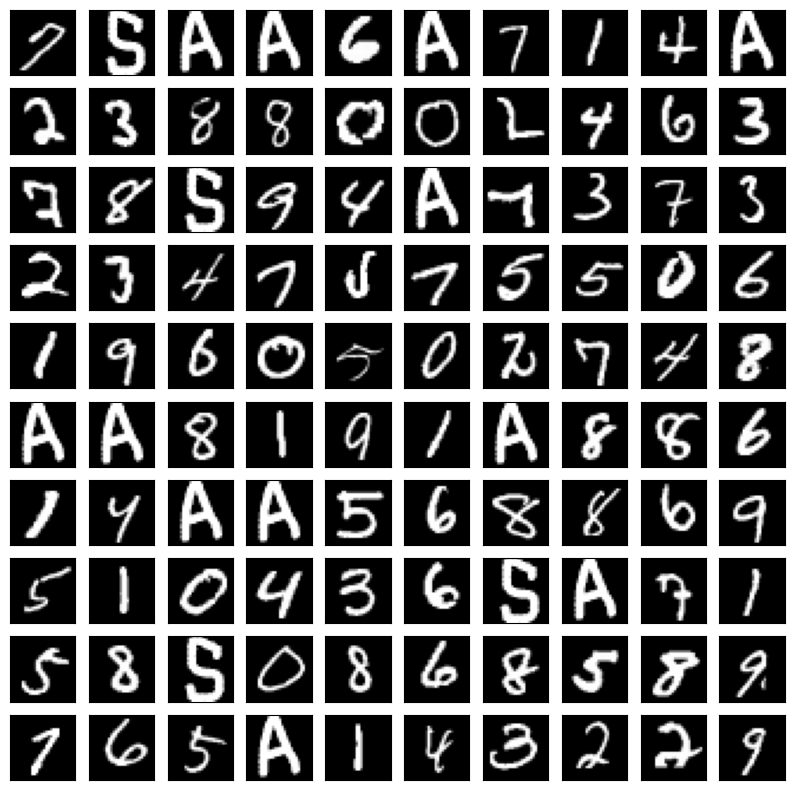

In [6]:
images = []
for i in range(100):
    images.append(new_image_set[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i],cmap='gray')

plt.show()

In [7]:
updated_model = keras.models.load_model('initially_trained_autoencoder.tf')

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

Epoch 1/15
4/4 [==============================] - 1s 39ms/step - loss: 0.2498 - val_loss: 0.2019
Epoch 2/15
4/4 [==============================] - 0s 14ms/step - loss: 0.2034 - val_loss: 0.1903
Epoch 3/15
4/4 [==============================] - 0s 14ms/step - loss: 0.1901 - val_loss: 0.1822
Epoch 4/15
4/4 [==============================] - 0s 14ms/step - loss: 0.1788 - val_loss: 0.1738
Epoch 5/15
4/4 [==============================] - 0s 14ms/step - loss: 0.1687 - val_loss: 0.1689
Epoch 6/15
4/4 [==============================] - 0s 14ms/step - loss: 0.1606 - val_loss: 0.1644
Epoch 7/15
4/4 [==============================] - 0s 14ms/step - loss: 0.1533 - val_loss: 0.1608
Epoch 8/15
4/4 [==============================] - 0s 14ms/step - loss: 0.1463 - val_loss: 0.1574
Epoch 9/15
4/4 [==============================] - 0s 14ms/step - loss: 0.1401 - val_loss: 0.1547
Epoch 10/15
4/4 [==============================] - 0s 14ms/step - loss: 0.1347 - val_loss: 0.1526
Epoch 11/15
4/4 [============

## Part 4

### Test the model on the original test set

4/4 [==============================] - 0s 2ms/step


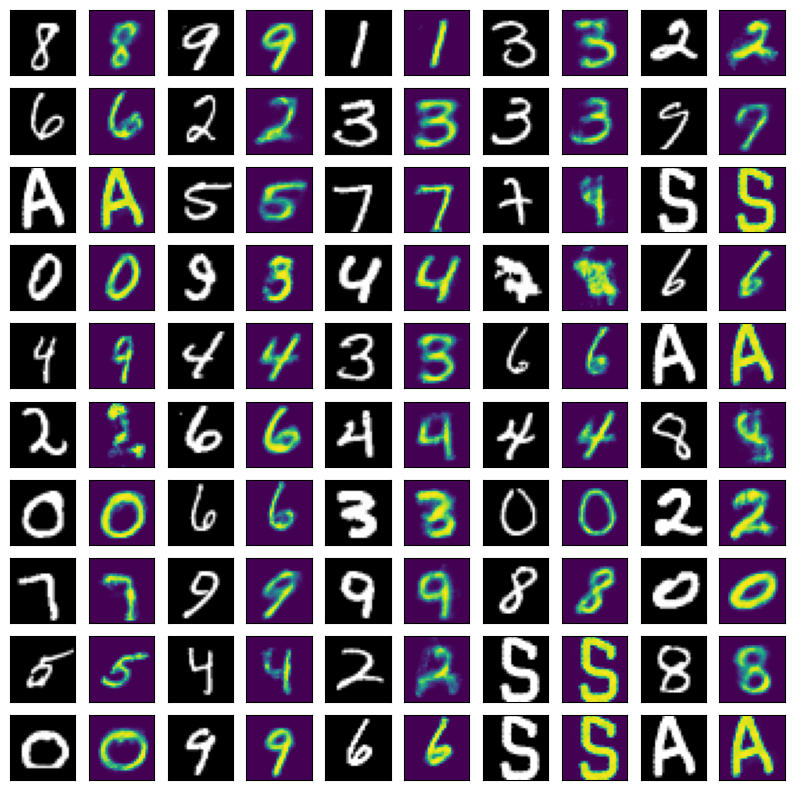

In [8]:
reconstructed_images = updated_model.predict(new_images_test)

images = []
for i in range(100):
    images.append(new_images_test[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Test the model on the new test set

1/1 [==============================] - 0s 13ms/step
(1, 784)
1/1 [==============================] - 0s 12ms/step
(1, 784)


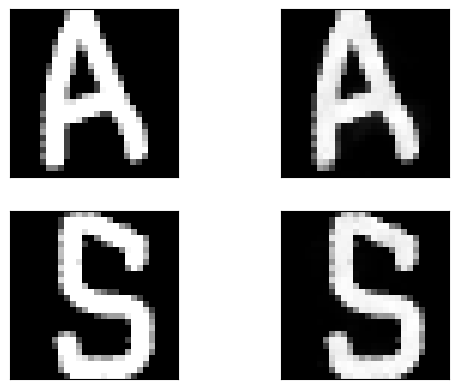

In [9]:
####################################
# loading image 1
image1 = tf.keras.utils.load_img('Letter_A.png', target_size=(28, 28), color_mode = "grayscale")

# loading image 2
image2 = tf.keras.utils.load_img('Letter_S.png', target_size=(28, 28), color_mode = "grayscale")

####################################
# predict an image from this sample
input_arr1 = tf.keras.utils.img_to_array(image1)
input_arr1 = input_arr1/ 255 # normalize between 0 and 1
input_arr1 = input_arr1.reshape(784)
input_arr1 = np.array([input_arr1])  # Convert single image to a batch with one image in it

prediction_01 = updated_model.predict(input_arr1)
print(prediction_01.shape)

####################################
# predict an image from this sample
input_arr2 = tf.keras.utils.img_to_array(image2)
input_arr2 = input_arr2/ 255 # normalize between 0 and 1
input_arr2 = input_arr2.reshape(784)
input_arr2 = np.array([input_arr2])  # Convert single image to a batch with one image in it

prediction_02 = updated_model.predict(input_arr2)
print(prediction_02.shape)

#####################################

#####################################
# display the four images side by side
# 
plt.subplot(2,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image1, cmap="gray")


plt.subplot(2,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(prediction_01[0].reshape(28,28), cmap="gray")

# 
plt.subplot(2,2,3)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image2, cmap="gray")


plt.subplot(2,2,4)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(prediction_02[0].reshape(28,28), cmap="gray")


plt.show()

## Conclusion

From the above observations, I can say that the saved model from ICP11 Autoencoder was not able to optimally recreate the two new characters as the model was not trained with this data before. This is clearly reflected by the difference (error) betweem the original images and the reconstructed images.

In the next step, I mixed the new characters to the originally trained 10 digits and randomly shuffled the data. I then retrained the model with this data. This way, the model didnot forget the previously trained data and is able to perform well with respect to the two new characters.